In [1]:
import collections
import json
import os

import numpy as np
import pandas as pd; pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm.notebook import tqdm

from pan20 import util
from pan20.util import chis, text
from pan20.util.lexicons import tweet_anger

### Load Data

In [2]:
df = tweet_anger.load_data()

/home/hanshan/anaconda3/envs/pan20/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hanshan/anaconda3/envs/pan20/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hanshan/anaconda3/envs/pan20/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (9,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
cv = tweet_anger.chi_var(df, degree=1)

In [29]:
cv.head()

,token,c1,c2,n1,n2,chi,period
0,i,40628,15855,29078,31680,3.067772,1
73,not,27442,5283,29078,31680,0.606200,1
47,my,27144,6207,29078,31680,0.548246,1
68,to,27153,6609,29078,31680,0.531515,1
12,the,25923,6598,29078,31680,0.468273,1


In [38]:
freqs = cv.groupby('token').sum().reset_index().set_index('token').reset_index()
freqs['f1'] = freqs.c1 / freqs.n1
freqs['f2'] = freqs.c2 / freqs.n2
anger = set(freqs[freqs.f1 > freqs.f2].token.values)

In [60]:
mus = cv.groupby('token').mean().reset_index().set_index('token').reset_index()
stds = cv.groupby('token').std().reset_index().set_index('token').reset_index()
mus = mus[['token', 'chi']].rename(columns={'chi': 'mu'}).set_index('token').reset_index()
stds = stds[['token', 'chi']].rename(columns={'chi': 'sd'}).set_index('token').reset_index()

In [61]:
mus.token = mus.token.astype(str)
stds.token = stds.token.astype(str)

In [62]:
s = mus.merge(stds, on='token')
s['s'] = s.mu / s.sd
s.sort_values(by=['s'], ascending=False, inplace=True)
s = s[s.token.isin(anger)]
s[s.mu > 0.0001].head(100)

,token,mu,sd,s
232,angry,0.002929,0.000702,4.173277
694,bloody,0.000629,0.000190,3.308625
1429,crap,0.000386,0.000144,2.676811
3025,humans,0.000241,0.000090,2.672402
1751,disgusted,0.000245,0.000096,2.553887
2687,grr,0.000633,0.000248,2.546859
6565,unfair,0.000250,0.000106,2.353479
4948,racism,0.000210,0.000091,2.313560
2463,fuming,0.000272,0.000118,2.310354
2438,frustrating,0.000469,0.000207,2.267365


In [65]:
import json
lex = list(s[s.mu > 0.0001].token.values)[0:1000]
with open('data/fake/al.json', 'w+') as f:
    f.write(json.dumps({'w': lex}))

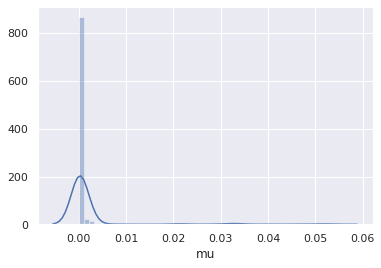

In [64]:
sns.distplot(s[s.mu > 0.0001].mu)

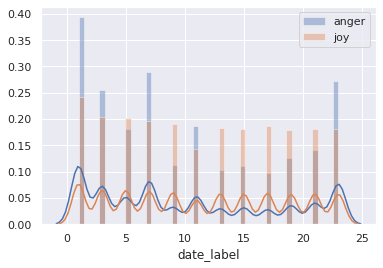

In [6]:
sns.distplot(df[df.emotion == 'anger'].date_label, label='anger')
sns.distplot(df[df.emotion == 'joy'].date_label, label='joy')
plt.legend()
plt.show()

### Get Top-$k$s

Do one order of n-grams at a time so as not to explode memory.

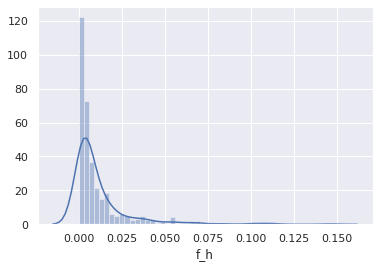

In [16]:
sns.distplot(unis.f_h)

In [15]:
unis['f_h'] = np.abs(unis.f - unis.h)
unis['s3'] = unis.s / unis.f_h
unis.sort_values(by=['s3'], ascending=False).head(100)

,c1,c2,n1,n2,chi,h,s,f,s2,s3,f_h
token,,,,,,,,,,,
jack,8239,186,135641,153102,0.031158,0.103092,3.212147e-03,0.060741,0.052882,0.075846,0.042351
disgusting,1278,94,135641,153102,0.004086,0.010015,4.092331e-05,0.009422,0.004343,0.069018,0.000593
dull,7264,47,135641,153102,0.028615,0.092876,2.657665e-03,0.053553,0.049627,0.067586,0.039323
makes,10103,1362,135641,153102,0.028101,0.129406,3.636458e-03,0.074483,0.048822,0.066210,0.054923
to,76832,72850,135641,153102,0.008191,0.678318,5.556236e-03,0.566436,0.009809,0.049662,0.111881
play,9615,1892,135641,153102,0.022299,0.130638,2.913093e-03,0.070886,0.041096,0.048753,0.059752
no,22556,12195,135641,153102,0.017661,0.266444,4.705637e-03,0.166292,0.028297,0.046985,0.100152
work,12308,3921,135641,153102,0.019918,0.171521,3.416326e-03,0.090740,0.037650,0.042291,0.080781
hate,10116,2984,135641,153102,0.017453,0.128703,2.246317e-03,0.074579,0.030120,0.041503,0.054124


In [8]:
unis['f'] = unis.c1 / unis.n1
unis['s2'] = unis.s / unis.f
unis.sort_values(by=['s2'], ascending=False).head(100)

,c1,c2,n1,n2,chi,h,s,f,s2
token,,,,,,,,,
jack,8239,186,135641,153102,0.031158,0.103092,0.003212,0.060741,0.052882
dull,7264,47,135641,153102,0.028615,0.092876,0.002658,0.053553,0.049627
makes,10103,1362,135641,153102,0.028101,0.129406,0.003636,0.074483,0.048822
play,9615,1892,135641,153102,0.022299,0.130638,0.002913,0.070886,0.041096
work,12308,3921,135641,153102,0.019918,0.171521,0.003416,0.090740,0.037650
boy,9363,2172,135641,153102,0.019533,0.131664,0.002572,0.069028,0.037257
hate,10116,2984,135641,153102,0.017453,0.128703,0.002246,0.074579,0.030120
no,22556,12195,135641,153102,0.017661,0.266444,0.004706,0.166292,0.028297
all,23205,15141,135641,153102,0.011269,0.278707,0.003141,0.171077,0.018358


In [7]:
unis = tweet_anger.get_top_k(df, 500, 1)
unis.head(500)

,c1,c2,n1,n2,chi,h,s
token,,,,,,,
to,76832,72850,135641,153102,0.008191,0.678318,5.556236e-03
no,22556,12195,135641,153102,0.017661,0.266444,4.705637e-03
and,56470,50264,135641,153102,0.008281,0.528011,4.372582e-03
makes,10103,1362,135641,153102,0.028101,0.129406,3.636458e-03
work,12308,3921,135641,153102,0.019918,0.171521,3.416326e-03
not,61089,57546,135641,153102,0.005712,0.597039,3.410473e-03
jack,8239,186,135641,153102,0.031158,0.103092,3.212147e-03
all,23205,15141,135641,153102,0.011269,0.278707,3.140688e-03
play,9615,1892,135641,153102,0.022299,0.130638,2.913093e-03


In [6]:
bis = tweet_anger.get_top_k(df, 500, 2)
bis.head(500)

,c1,c2,n1,n2,chi,h,s
token,,,,,,,
no,34616,30874,174631,227185,0.006997,0.173176,1.211678e-03
makes,11497,3449,174631,227185,0.017605,0.048025,8.454996e-04
hate,12278,6417,174631,227185,0.009800,0.077941,7.638281e-04
jack,8451,495,174631,227185,0.024109,0.027405,6.607187e-04
work,14256,8880,174631,227185,0.008198,0.077399,6.345010e-04
people,21024,17402,174631,227185,0.005449,0.113488,6.183782e-04
play,10703,4980,174631,227185,0.010154,0.051010,5.179603e-04
dull,7281,98,174631,227185,0.023208,0.022272,5.168908e-04
boy,9777,5127,174631,227185,0.007684,0.044714,3.435743e-04


In [19]:
tris = tweet_anger.get_top_k(df, k=500, degree=3)
tris.head(100)

trigrams


KeyboardInterrupt: 

### Calculate $\chi^2$

Looks like there was a campaign or something that repeated "All work and no play makes jack a dull boy." That is rather skewing our statistics.

In [55]:
chi1 = tweet_anger.calculate_chi(df, 1)

In [13]:
chi2 = tweet_anger.calculate_chi(df, 2)

In [14]:
chi3 = tweet_anger.calculate_chi(df, 3)

In [85]:
df['quadgrams'] = df.unigrams.apply(lambda x: text.to_quadgrams(str_to_list(x)))

In [86]:
chi4 = tweet_anger.calculate_chi(df, 4)

### Calculate $h$

In [47]:
h1 = tweet_anger.calculate_entropy(df, 1)

In [10]:
h2 = tweet_anger.calculate_entropy(df, 2)

In [11]:
h3 = tweet_anger.calculate_entropy(df, 3)

### Scoring

In [61]:
s1 = tweet_anger.join_chi_ent(chi1.reset_index(), h1.reset_index())
s1['s'] = s1.chi * s1.h
s1.sort_values(by=['s'], ascending=False, inplace=True)
s1[s1.c1 > s1.c2].head(100)

,c1,c2,n1,n2,chi,h,s
token,,,,,,,
no,32127,27787,162477,209464,0.007709,0.171359,0.001321
makes,11163,3073,162477,209464,0.019513,0.047434,0.000926
jack,8419,442,162477,209464,0.026136,0.027216,0.000711
work,13280,8002,162477,209464,0.008642,0.076599,0.000662
play,10423,4516,162477,209464,0.011576,0.051284,0.000594
dull,7280,85,162477,209464,0.024987,0.022305,0.000557
people,18841,15837,162477,209464,0.004739,0.109280,0.000518
hate,9942,5679,162477,209464,0.007101,0.071150,0.000505
boy,9601,4598,162477,209464,0.009242,0.045533,0.000421


In [ ]:
s2 = tweet_anger.join_chi_ent(chi2, h2)
s2['s'] = s2.chi * s2.h
s2.sort_values(by=['s'], ascending=False, inplace=True)
s2.head(100)

In [ ]:
s3 = tweet_anger.join_chi_ent(chi3, h3)
s3['s'] = s3.chi * s3.h
s3.sort_values(by=['s'], ascending=False, inplace=True)
s3.head(100)

### .csv conversions

In [101]:
joy = ['tears_of_joy_2019-05.csv', 'tears_of_joy_2019-11.csv', 'tears_of_joy_2020-05.csv']
ang = ['angry_face_2018-11.csv', 'angry_face_2019-11.csv', 'angry_face_2020-05.csv']
joy = [pd.read_csv(os.path.join(folder, x)) for x in joy]
ang = [pd.read_csv(os.path.join(folder, x)) for x in ang]
joy = pd.concat(joy, axis=0)
ang = pd.concat(ang, axis=0)

/home/hanshan/anaconda3/envs/pan20/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [102]:
joy['label'] = 'joy'
ang['label'] = 'ang'
df = pd.concat([joy, ang], axis=0)

In [182]:
df['toks'] = df.tweet.apply(text.tokenize)

In [28]:
cj = collections.Counter()
ca = collections.Counter()

with tqdm(total=len(df[df.date_label > 1])) as pbar:
    for _, x in df[df.date_label > 1].iterrows():
        if x.emotion == 'joy':
            cj.update(x.toks)
        else:
            ca.update(x.toks)
        pbar.update()

In [29]:
dfc = chis.get_chis(ca, cj)

In [30]:
dfc[dfc.c1 > dfc.c2].head(50)

,token,c1,c2,n1,n2,chi
1290,disgusting,2290,180,128820,152819,0.007866
217,angry,2673,395,128820,152819,0.007601
544,shame,2197,466,128820,152819,0.005198
2089,government,1689,259,128820,152819,0.004709
398,country,2776,907,128820,152819,0.004688
299,trump,3374,1459,128820,152819,0.004077
637,hate,6117,3723,128820,152819,0.003935
640,dare,1371,290,128820,152819,0.003237
365,our,7521,5347,128820,152819,0.003115
179,people,13553,11228,128820,152819,0.003115


In [52]:
dfc.to_csv('data/fake/chi_emo.csv', index=False)

In [175]:
a = []
for _, x in df.iterrows():
    if 'youre' in x.toks:
        a.append(x.tweet)

In [176]:
len(a)

365

In [179]:
a[1]

'Youre just like your idol, now i see 😂🤦\u200d♂️'

In [181]:
text.tokenize(a[1])

['youre', 'just', 'like', 'your', 'idol', 'now', 'i', 'see']

I was expecting those results to be more reasonable than they are. Cummings still up the list?
- Maybe my calculation is off
- Other plan is to scale by entropy over time. Suppose we have 20 time periods, $t$. Let $T_w$ be the distribution over $\chi^2$ over time for word $w$. Then, $h(T_w)$ should be *greater* for words with a stable relationship to anger. A multiplication might do the trick:

$$
s_w = h(T_w) \cdot \chi^2_w
$$

### Calculating Entropy over Time Labels

In [5]:
label_map = {
    '2017-05': 0,
    '2017-11': 1,
    '2018-05': 2,
    '2018-11': 3,
    '2019-05': 4,
    '2019-11': 5,
    '2020-05': 6,
}

In [6]:
# combine all into single df
folder = 'data/fake/twt_emo'

def load_df(fn):
    emotion = 'anger' if 'angry' in fn else 'joy'
    date_label = fn.split('_')[-1].split('.')[0]
    date_label = label_map[date_label]
    df = pd.read_csv(os.path.join(folder, fn))
    df['emotion'] = emotion
    df['date_label'] = date_label
    return df

df = pd.concat([load_df(f) for f in os.listdir(folder)], axis=0)

In [7]:
df['toks'] = df.tweet.apply(text.tokenize)

In [11]:
V = set([])
for _, x in df.iterrows():
    V.update(x.toks)

In [15]:
V = util.IxDict(list(V))

In [18]:
P = np.zeros((len(label_map), len(V)))
with tqdm(total=6) as pbar:
    for date_label in range(1, 7):
        dfd = df[df.date_label == date_label]
        counts = collections.Counter()
        for _, x in dfd.iterrows():
            counts.update(x.toks)
        n = sum(counts.values())
        for token, count in counts.items():
            token_ix = V[token]
            P[date_label, token_ix] = counts[token] / n
        pbar.update()

In [27]:
h = util.entropy(np.clip(P, a_min=1e-16, a_max=1.), 0)

In [33]:
h[V['fuck']]

0.05932889375639372

In [36]:
ent = []
for ix, tok in V.items():
    ent.append({
        'token': tok,
        'h': h[ix],
    })
ent = pd.DataFrame(ent)

In [38]:
ent = ent.sort_values(by=['h'], ascending=False)

In [44]:
pd.set_option('display.max_rows', 500)
ent.head(500)

,token,h
101173,i,1.055855
222614,the,0.838564
227331,to,0.720153
253559,you,0.704227
160027,not,0.597644
8909,and,0.552212
108331,it,0.519359
99718,https,0.517605
107682,is,0.484184
222423,that,0.447924


In [45]:
ent.to_csv('data/fake/emo_ent.csv', index=False)

In [54]:
dfc.set_index('token', inplace=True)

In [55]:
ent.set_index('token', inplace=True)

In [56]:
dfc = dfc.join(ent, on='token')

In [57]:
dfc.head()

,c1,c2,n1,n2,chi,h
token,,,,,,
https,44539,107216,141087,174809,0.087719,0.517605
you,85908,145129,141087,174809,0.061615,0.704227
lol,1270,21581,141087,174809,0.048247,0.113552
the,122487,169441,141087,174809,0.036047,0.838564
lmao,417,12555,141087,174809,0.029766,0.070466


In [58]:
dfc['s'] = dfc.chi * dfc.h

In [65]:
dfc = dfc.sort_values(by=['chi'], ascending=False)

In [69]:
dfc = dfc.sort_values(by=['s'], ascending=False)

In [108]:
l1 = list(dfa[dfa.c1 > dfa.c2].reset_index().iloc[0:300].token.values)

In [31]:
l1 = list(dfc[dfc.c1 > dfc.c2].reset_index().iloc[0:500].token.values)

In [38]:
l1 = list(a[a.c1 > a.c2].reset_index().iloc[0:500].token.values)

In [39]:
with open('data/fake/mylex.json', 'w+') as f:
    f.write(json.dumps({'words': l1}))

In [85]:
stopw = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [89]:
dfc = dfc.reset_index()

In [100]:
dfc['pos'] = dfc.token.apply(lambda x: pos_tag([x])[0][1])

In [ ]:
dfc['is_stop'] = dfc.token.apply(lambda x: x in stopw)

In [104]:
dfa = dfc[(~dfc.is_stop) & (~dfc.pos.isin(['NN', 'NNS']))]

In [105]:
dfa[dfa.c1 > dfa.c2].head(100)

,token,c1,c2,n1,n2,chi,h,s,is_stop,pos
86,angry,3027,469,141087,174809,0.007958,0.021668,1.724248e-04,False,JJ
93,disgusting,2566,204,141087,174809,0.008237,0.017682,1.456567e-04,False,VBG
142,fucking,4800,3705,141087,174809,0.001552,0.048209,7.482806e-05,False,VBG
221,pissed,1606,623,141087,174809,0.002157,0.015089,3.254200e-05,False,VBN
222,stupid,2519,1694,141087,174809,0.001252,0.025852,3.235989e-05,False,JJ
288,worst,1644,975,141087,174809,0.001109,0.017300,1.919117e-05,False,JJS
295,ugh,1056,304,141087,174809,0.001903,0.009686,1.843580e-05,False,IN
308,absolutely,1626,1023,141087,174809,0.000956,0.017230,1.647956e-05,False,RB
327,annoying,1489,919,141087,174809,0.000917,0.016110,1.476589e-05,False,VBG
347,poor,1800,1325,141087,174809,0.000677,0.020114,1.361035e-05,False,JJ


In [ ]:
dfc[dfc.c1 > dfc.c2].head(100)

In [68]:
cutoff = 0.0035
dfc[(dfc.c1 > dfc.c2) & (dfc.h >= cutoff)].head(500)

,c1,c2,n1,n2,chi,h,s
token,,,,,,,
disgusting,2566,204,141087,174809,0.008237,0.017682,1.456567e-04
angry,3027,469,141087,174809,0.007958,0.021668,1.724248e-04
shame,2421,548,141087,174809,0.005221,0.018932,9.885121e-05
government,1817,295,141087,174809,0.004661,0.013213,6.158583e-05
hate,7193,4424,141087,174809,0.004599,0.062348,2.867710e-04
country,3033,1068,141087,174809,0.004567,0.025326,1.156676e-04
trump,3740,1893,141087,174809,0.003469,0.033228,1.152780e-04
people,15255,13092,141087,174809,0.003341,0.131804,4.404176e-04
dare,1524,366,141087,174809,0.003151,0.012519,3.945295e-05


In [ ]:
pa = []
pj = []


        

In [25]:
c = pd.read_csv('data/fake/chi_emo.csv')
h = pd.read_csv('data/fake/emo_ent.csv')

In [26]:
h.head()

,token,h
0,i,1.055855
1,the,0.838564
2,to,0.720153
3,you,0.704227
4,not,0.597644


In [27]:
c.set_index('token', inplace=True)
h.set_index('token', inplace=True)
a = c.join(h, on='token')

In [34]:
a['s'] = a.chi * a.h

In [36]:
a = a.sort_values(by=['s'], ascending=False)

In [40]:
a[a.c1 > a.c2].head(50)

,c1,c2,n1,n2,chi,h,s
token,,,,,,,
people,15255,13092,141087,174809,0.003341,0.131804,0.000440
hate,7193,4424,141087,174809,0.004599,0.062348,0.000287
their,9408,7252,141087,174809,0.003141,0.085112,0.000267
our,8440,6357,141087,174809,0.003046,0.077447,0.000236
should,8531,6793,141087,174809,0.002500,0.079297,0.000198
angry,3027,469,141087,174809,0.007958,0.021668,0.000172
disgusting,2566,204,141087,174809,0.008237,0.017682,0.000146
country,3033,1068,141087,174809,0.004567,0.025326,0.000116
trump,3740,1893,141087,174809,0.003469,0.033228,0.000115


In [35]:
a.head()

,c1,c2,n1,n2,chi,h,s
token,,,,,,,
https,44539,107216,141087,174809,0.087719,0.517605,0.045404
you,85908,145129,141087,174809,0.061615,0.704227,0.043391
lol,1270,21581,141087,174809,0.048247,0.113552,0.005479
the,122487,169441,141087,174809,0.036047,0.838564,0.030228
lmao,417,12555,141087,174809,0.029766,0.070466,0.002097


In [2]:
with open('data/fake/angry_face.txt') as f:
    lines = f.readlines()

In [5]:
def parse(line):
    split = line.split(' ')
    return {
        'tweet_id': int(split[0]),
        'date': split[1],
        'time': split[2],
        'tz': split[3],
        'user': split[4][1:-1],
        'tweet': ' '.join(split[5:]).strip(),
    }

In [4]:
print(lines[0].split(' '))

['1265963305576865792', '2020-05-28', '19:09:07', 'CST', '<ShibiPayamal>', 'The', 'picture', 'is', 'sickening', '😠\n']


### Angry Face

In [7]:
tweets = [parse(l) for l in lines]

In [9]:
tweets = pd.DataFrame(tweets)

In [10]:
tweets.head()

,tweet_id,date,time,tz,user,tweet
0,1265963305576865792,2020-05-28,19:09:07,CST,ShibiPayamal,The picture is sickening 😠
1,1265963253907124224,2020-05-28,19:08:54,CST,chim_durgesh,I am waiting since 3 months 😠😠 For OP8pro are ...
2,1265963232327540737,2020-05-28,19:08:49,CST,astaekim,😠😠 bish you're also friends with my friends 😠😠
3,1265963217140043776,2020-05-28,19:08:46,CST,SteBrony,Me: Searching for classic Powerpuff Girls clip...
4,1265963215084638208,2020-05-28,19:08:45,CST,lunchtme,okay now which one of you somtaengs/sommungchi...


In [11]:
tweets.to_csv('angry_face.csv')

In [16]:
text.tokenize(tweets.iloc[0].tweet)

['the', 'picture', 'is', 'sickening', '😠']

In [17]:
tweets['toks'] = tweets.tweet.apply(text.tokenize)

In [21]:
counts = collections.Counter()
with tqdm(total=len(tweets)) as pbar:
    for _, x in tweets.iterrows():
        counts.update(x.toks)
        pbar.update()

In [22]:
n = sum(counts.values())
n

1759355

In [23]:
words = set(counts.keys())

In [24]:
len(counts)

125148

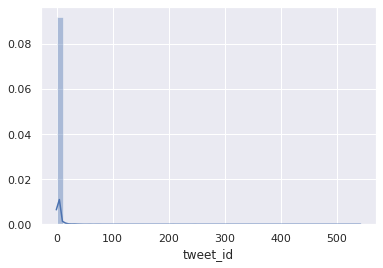

In [27]:
sns.distplot(tweets.groupby('user').count().reset_index().tweet_id)

### Tears of Joy

In [29]:
with open('data/fake/tears_of_joy.txt') as f:
    lj = f.readlines()
tj = [parse(l) for l in lj]
tj = pd.DataFrame(tj)
tj['toks'] = tj.tweet.apply(text.tokenize)
cj = collections.Counter()
for _, x in tj.iterrows():
    cj.update(x.toks)

In [30]:
nj = len(cj)
nj

91150

In [33]:
n

1759355

That's interesting in itself. More things to be angry about than happy?

### Chi-Squareds

In [35]:
# intersect sets of tokens first
wa = words
wj = set(cj.keys())
ww = wa.intersection(wj)
ww = list(ww)
print(len(ww))

25023


In [36]:
# filter tokens by the intersections
fca = {k: c for k, c in counts.items() if k in ww}
fcj = {k: c for k, c in cj.items() if k in ww}

In [37]:
# question: which `n` is correct?
# let's try with both and see how results differ.

In [41]:
chi1 = chis.get_chis(fca, fcj, sum(fca.values()), sum(fcj.values()))

In [46]:
pd.set_option('display.max_rows', 500)
chi1[chi1.c1 > chi1.c2].head(500)

,token,c1,c2,n1,n2,chi
4,😠,42025,5,1591846,1391488,227.808309
1721,cummings,687,9,1591846,1391488,0.031978
4702,\,212,1,1591846,1391488,0.027934
626,😠😂,164,1,1591846,1391488,0.016663
2776,reservation,261,3,1591846,1391488,0.013894
4771,eid,238,3,1591846,1391488,0.011523
56,!,40284,19368,1591846,1391488,0.011246
153,disgrace,187,2,1591846,1391488,0.010718
759,shameful,131,1,1591846,1391488,0.010594
1198,pmoindia,131,1,1591846,1391488,0.010594


Feels like my calculation is off insofar as high $\chi^2$ seems to indicate uniqueness to either class. Might have to review that paper and calculation quickly.

In [ ]:
anger = [
    # 5 per row
    'disgrace', 'shameful', 'disgusting', 'angry', 'snatches',
    'shame', 'disgraceful', 'despicable', 'bloody', 'vile',
    'rules', 'dare', 'unbelievable', 'behaviour', 'cruel',
    'should', 'intimidating', 'greed', 'scum', 'bastards',
    'deserve', 'evil', 'their', 'our', 'us',
    'them', 'sickening', 
    
]
suspicious = [  # in terms of being too tied to content
    'resign', 'property', 'migrants', 'refund', 'taxpayers',
    'guidelines', 'reservation', 'deaths', 'infected', 
    
]
suspect_need_bigrams = [
    'dunk', 'mutual', ''
]

## Automatic Methodology

1. Collect top-k uni, bi, tri, and quad-grams for the class, and the control sets, at 5 different time periods in order to control for topics.
2. Select the top-k by reducing variance across the time periods (like a 5-fold CV). Somehow do this statistically.
3. With the top-k, use the function learning algorithm from the ACL paper to get a weighted dictionary.
4. Validate on numerous tasks and against LIWC as a baseline.

Major limitation with current methodology is can only do emotional classes that are clear from emoji usage. If there was a way to automatically obtain labeled data for other psychological classes of interest, the method could hopefully make LIWC defunct and provide a better, open source alternative.

For full automation, need to only keep actual words, need to filter out:
- emoji
- punctuation - but, it looks like `!` carries signal in this data. Near top of the list.
- things like `eid` - what the hell is that?
- will need to use KZ's cleaning method to map `n't` to `not`, etc.

Note on potential for publishing this work:
- Comparing to the [reference paper](https://www.aclweb.org/anthology/W19-6402.pdf) from ACL's second financial narrative workshop in 2019, it looks like they use a full vocab, but my idea is to exclude content words, similar to LIWC, hence the top-k selection process. We use different tasks, and my methodology is not comparable to theirs. However, comparison could be done with mine by using a baseline that essentially just implements their method. Validation would be better generalization of my methodology. On what? Test set accuracy? Some thought required there.
- Also theirs is just a workshop paper, would definitely need to look at related work cited therein, and also at the stuff on Twitter emojis and emotion classification.

In [50]:
# what is the period of time covered by the above tweets?
print(tweets.date.min())
print(tweets.date.max())
print(tj.date.min())
print(tj.date.max())

2020-05-23
2020-05-28
2020-05-29
2020-05-29


Right, so actually, my previous hypothesis, that there are more topics to be angry about and less to be happy about, is not supported here - rather, there are far more happy tweets than angry ones, so the time window I got is quite different.

So what is a reasonable time to go backwards? 6 month blocks I think. 6months ago is pre-COVID, so should be quite different. There are the arguments to use:

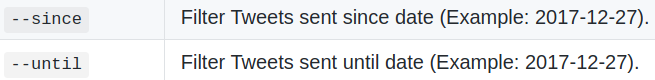